In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from soupsieve.util import lower
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint

In [2]:
data=pd.read_csv(r'C:\Users\Esraa\Desktop\term7\ML\labs\your_data.csv')
data.head()

,Unnamed: 0,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,0,22,1.0,55,94,0.6,165,75,0,25,1,1
1,1,27,1.1,70,147,0.7,165,126,1,23,2,0
2,2,27,0.8,20,79,0.5,170,93,0,31,1,1
3,3,20,1.0,35,91,1.2,180,102,1,27,1,0
4,4,19,0.8,30,91,1.0,165,93,0,13,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159256 non-null  int64  
 1   AST                  159256 non-null  int64  
 2   serum creatinine     159256 non-null  float64
 3   age                  159256 non-null  int64  
 4   fasting blood sugar  159256 non-null  int64  
 5   eyesight(right)      159256 non-null  float64
 6   height(cm)           159256 non-null  int64  
 7   LDL                  159256 non-null  int64  
 8   dental caries        159256 non-null  int64  
 9   ALT                  159256 non-null  int64  
 10  hearing(right)       159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 14.6 MB


In [4]:
data.dtypes[data.dtypes == 'int64']

Unnamed: 0             int64
AST                    int64
age                    int64
fasting blood sugar    int64
height(cm)             int64
LDL                    int64
dental caries          int64
ALT                    int64
hearing(right)         int64
smoking                int64
dtype: object

In [5]:
data.dtypes[data.dtypes == 'float64']

serum creatinine    float64
eyesight(right)     float64
dtype: object

In [6]:
print(data.dtypes)

Unnamed: 0               int64
AST                      int64
serum creatinine       float64
age                      int64
fasting blood sugar      int64
eyesight(right)        float64
height(cm)               int64
LDL                      int64
dental caries            int64
ALT                      int64
hearing(right)           int64
smoking                  int64
dtype: object


categorical data (dental caries, hearing(right), smoking) are represented in nominal data

In [7]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


Make sure no duplicates in data and if there is duplicates remove them

In [8]:
data.isnull().sum() 

Unnamed: 0             0
AST                    0
serum creatinine       0
age                    0
fasting blood sugar    0
eyesight(right)        0
height(cm)             0
LDL                    0
dental caries          0
ALT                    0
hearing(right)         0
smoking                0
dtype: int64

Making sure that the data has no NULL values 

In [9]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AST                  159256 non-null  int64  
 1   serum creatinine     159256 non-null  float64
 2   age                  159256 non-null  int64  
 3   fasting blood sugar  159256 non-null  int64  
 4   eyesight(right)      159256 non-null  float64
 5   height(cm)           159256 non-null  int64  
 6   LDL                  159256 non-null  int64  
 7   dental caries        159256 non-null  int64  
 8   ALT                  159256 non-null  int64  
 9   hearing(right)       159256 non-null  int64  
 10  smoking              159256 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.4 MB


Drop the unnamed column because it is like index column so it is redundant

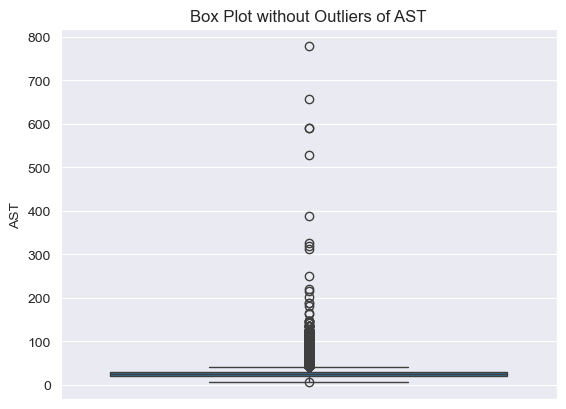

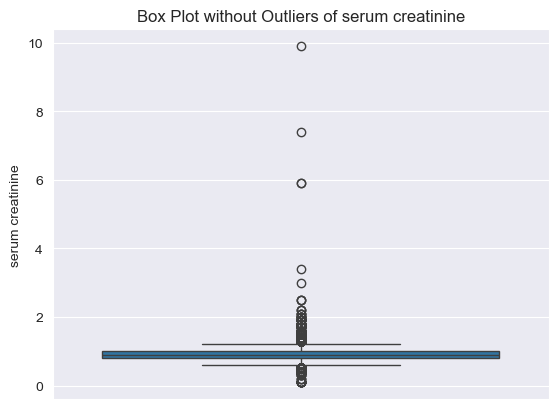

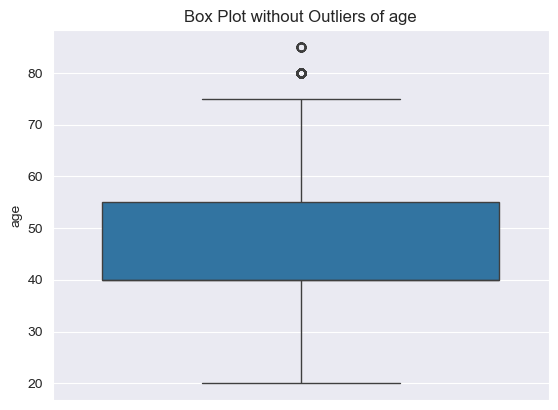

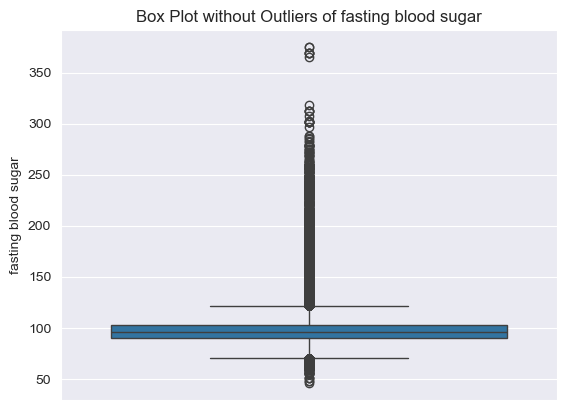

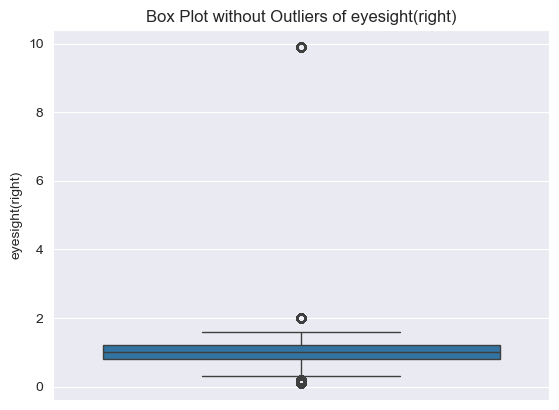

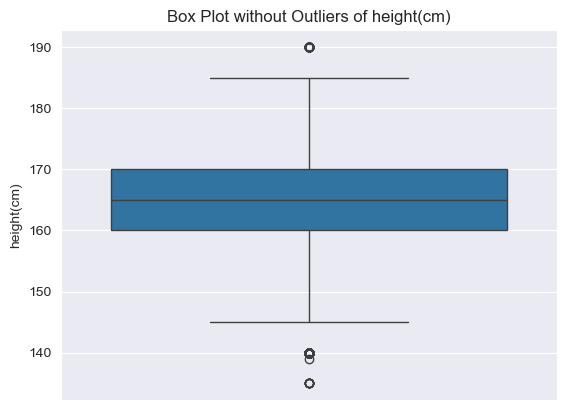

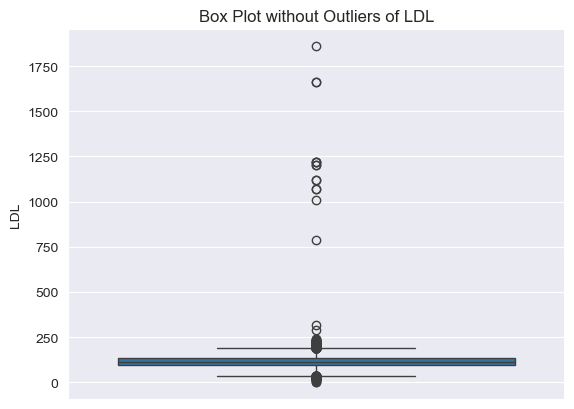

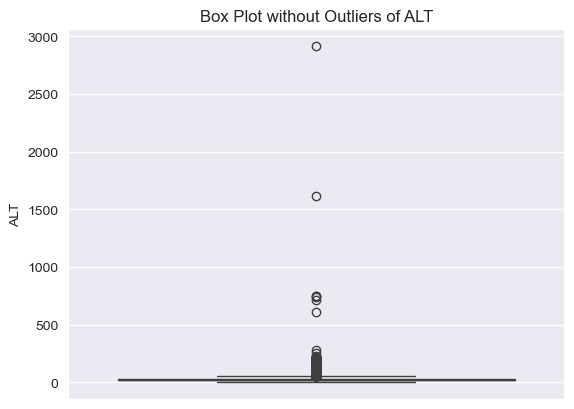

In [11]:
numeric_columns = data[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]


for i in numeric_columns:
    sns.boxplot(data[i])
    plt.title(f'Box Plot without Outliers of {i}')
    plt.show()

In [12]:
# Filter only numerical columns
#numeric_columns = data.select_dtypes(include=np.number).columns
numeric_columns = data[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]

# Collect all rows to drop
rows_to_drop = set()

for i in numeric_columns:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Find rows with outliers (positional indices)
    upper_array = np.where(data[i] > upper)[0]
    lower_array = np.where(data[i] < lower)[0]

    # Add rows to the set (positional indices)
    rows_to_drop.update(upper_array)
    rows_to_drop.update(lower_array)

# Convert positional indices to current DataFrame indices
rows_to_drop = data.index[list(rows_to_drop)]

# Drop all rows with outliers using their current index
data = data.drop(index=rows_to_drop).reset_index(drop=True)

print("Shape after outlier removal:", data.shape)


Shape after outlier removal: (132844, 11)


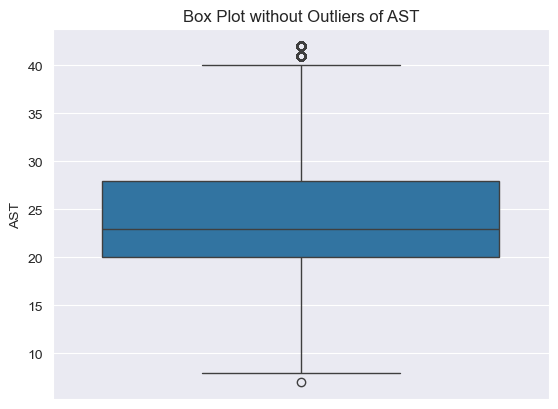

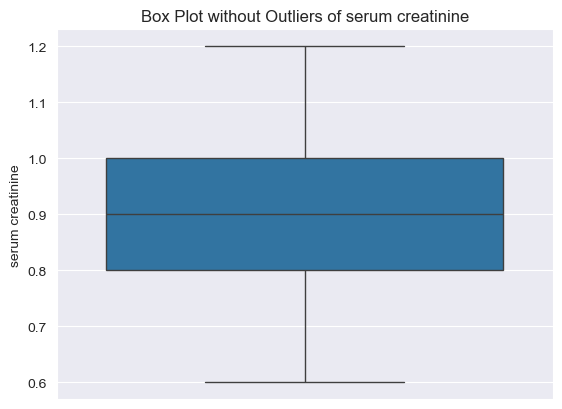

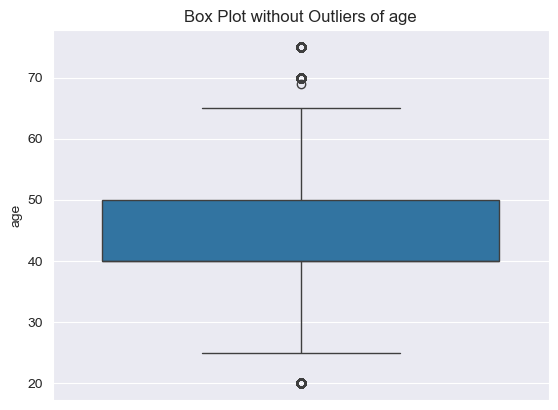

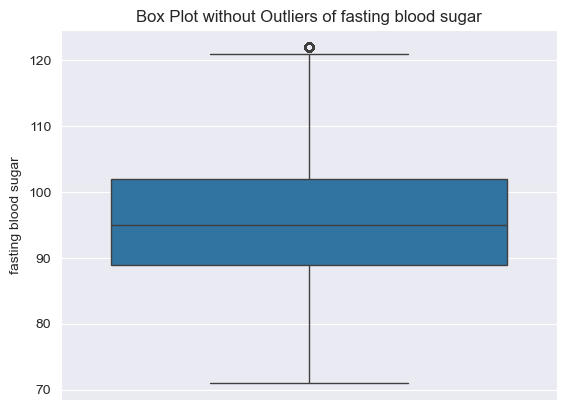

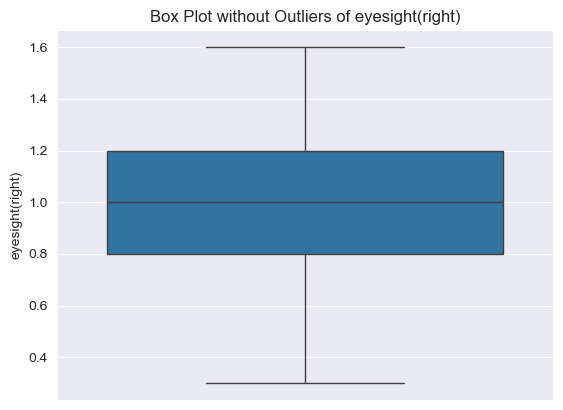

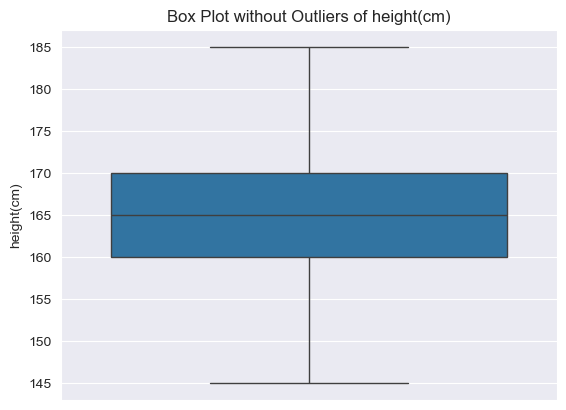

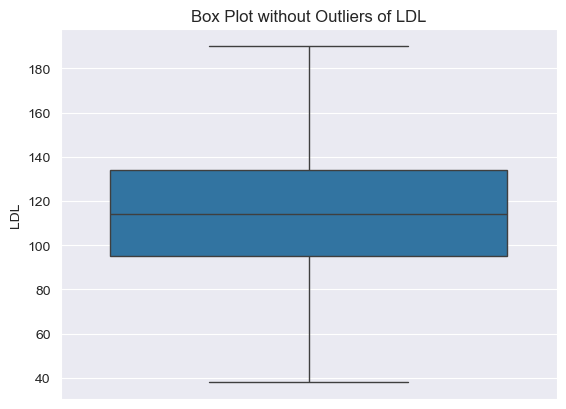

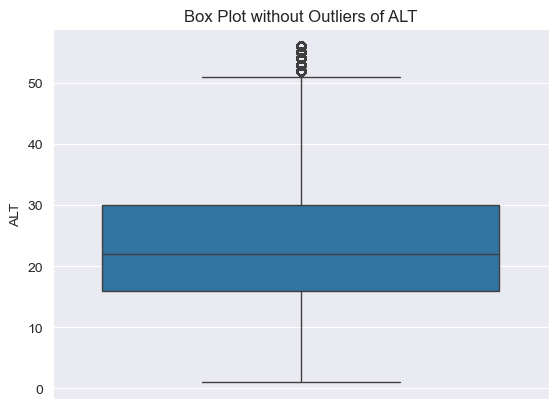

In [13]:
numeric_columns = data[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]


for i in numeric_columns:
    sns.boxplot(data[i])
    plt.title(f'Box Plot without Outliers of {i}')
    plt.show()

In [14]:
display(data)

,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,22,1.0,55,94,0.6,165,75,0,25,1,1
1,27,0.8,20,79,0.5,170,93,0,31,1,1
2,20,1.0,35,91,1.2,180,102,1,27,1,0
3,19,0.8,30,91,1.0,165,93,0,13,1,1
4,24,0.7,50,101,1.2,170,99,1,42,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132839,24,1.1,25,96,1.2,180,123,1,29,1,0
132840,21,0.6,50,89,1.0,155,108,0,20,1,0
132841,15,0.6,40,84,1.0,160,93,0,9,1,0
132842,22,1.1,50,122,1.0,165,80,0,17,1,1


In [15]:
def max_normalization(data):
    df_max_scaled = data.copy() 
    data_columns=df_max_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]
    for column in data_columns: 
        df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
    return df_max_scaled
df_max_scaled = max_normalization(data)
display(df_max_scaled)

,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,0.523810,0.833333,0.733333,0.770492,0.3750,0.891892,0.394737,0,0.446429,1,1
1,0.642857,0.666667,0.266667,0.647541,0.3125,0.918919,0.489474,0,0.553571,1,1
2,0.476190,0.833333,0.466667,0.745902,0.7500,0.972973,0.536842,1,0.482143,1,0
3,0.452381,0.666667,0.400000,0.745902,0.6250,0.891892,0.489474,0,0.232143,1,1
4,0.571429,0.583333,0.666667,0.827869,0.7500,0.918919,0.521053,1,0.750000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132839,0.571429,0.916667,0.333333,0.786885,0.7500,0.972973,0.647368,1,0.517857,1,0
132840,0.500000,0.500000,0.666667,0.729508,0.6250,0.837838,0.568421,0,0.357143,1,0
132841,0.357143,0.500000,0.533333,0.688525,0.6250,0.864865,0.489474,0,0.160714,1,0
132842,0.523810,0.916667,0.666667,1.000000,0.6250,0.891892,0.421053,0,0.303571,1,1


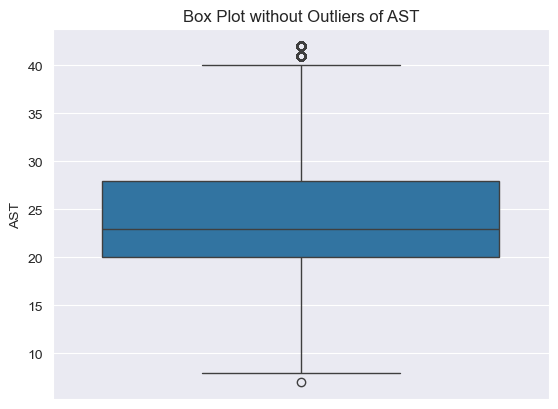

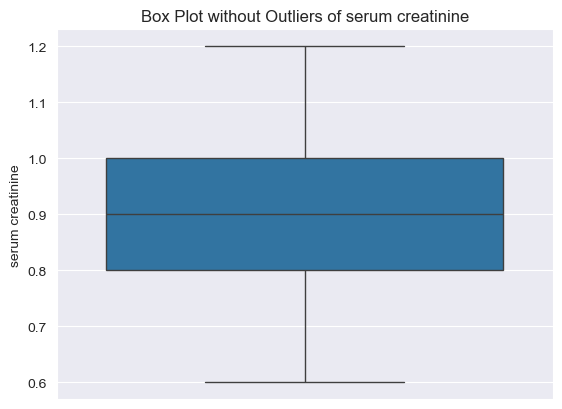

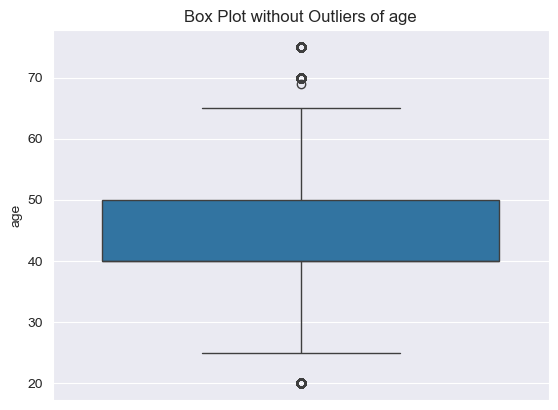

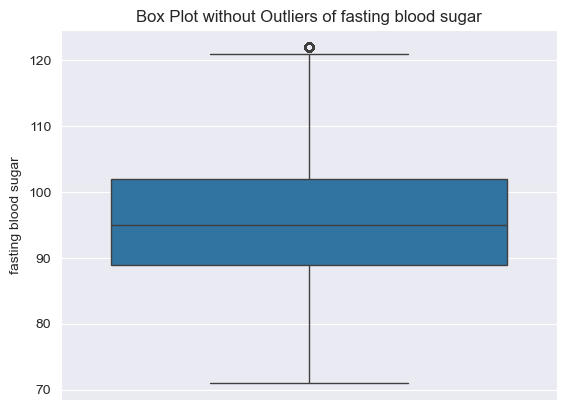

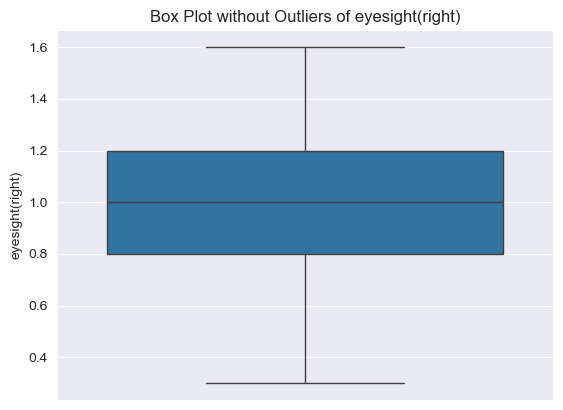

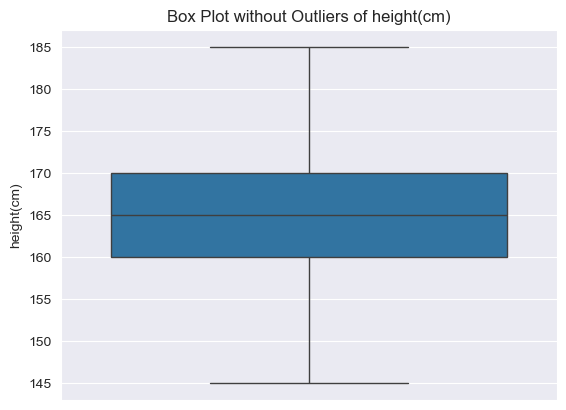

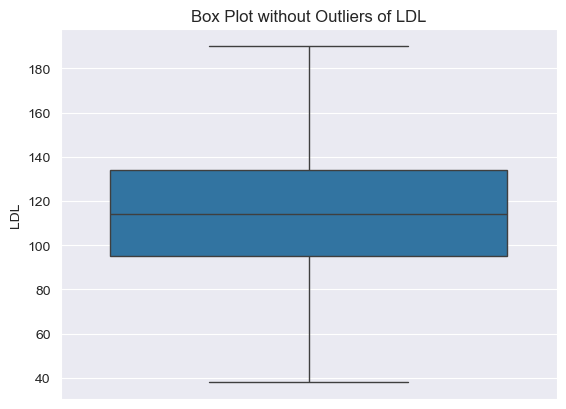

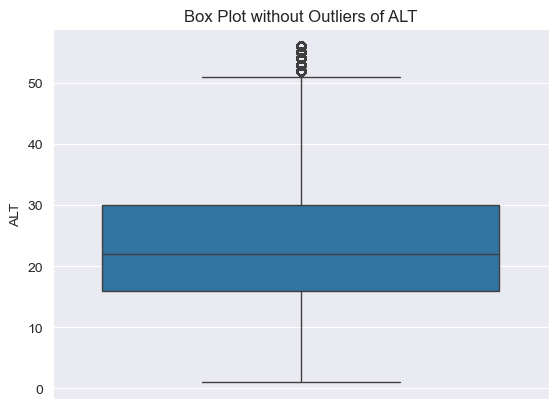

In [16]:
numeric_columns = df_max_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]


for i in numeric_columns:
    sns.boxplot(data[i])
    plt.title(f'Box Plot without Outliers of {i}')
    plt.show()

In [17]:
def min_max_normalization(data):
    df_min_max_scaled = data.copy() 
    data_columns=df_min_max_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]
    for column in data_columns: 
        df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())   
    return df_min_max_scaled
df_min_max_scaled = min_max_normalization(data)
display(df_min_max_scaled)

,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,0.428571,0.666667,0.636364,0.450980,0.230769,0.500,0.243421,0,0.436364,1,1
1,0.571429,0.333333,0.000000,0.156863,0.153846,0.625,0.361842,0,0.545455,1,1
2,0.371429,0.666667,0.272727,0.392157,0.692308,0.875,0.421053,1,0.472727,1,0
3,0.342857,0.333333,0.181818,0.392157,0.538462,0.500,0.361842,0,0.218182,1,1
4,0.485714,0.166667,0.545455,0.588235,0.692308,0.625,0.401316,1,0.745455,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132839,0.485714,0.833333,0.090909,0.490196,0.692308,0.875,0.559211,1,0.509091,1,0
132840,0.400000,0.000000,0.545455,0.352941,0.538462,0.250,0.460526,0,0.345455,1,0
132841,0.228571,0.000000,0.363636,0.254902,0.538462,0.375,0.361842,0,0.145455,1,0
132842,0.428571,0.833333,0.545455,1.000000,0.538462,0.500,0.276316,0,0.290909,1,1


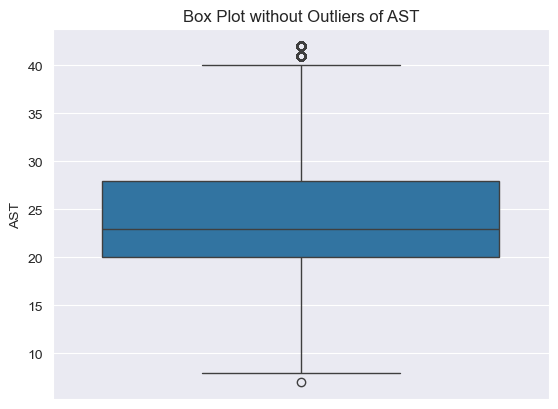

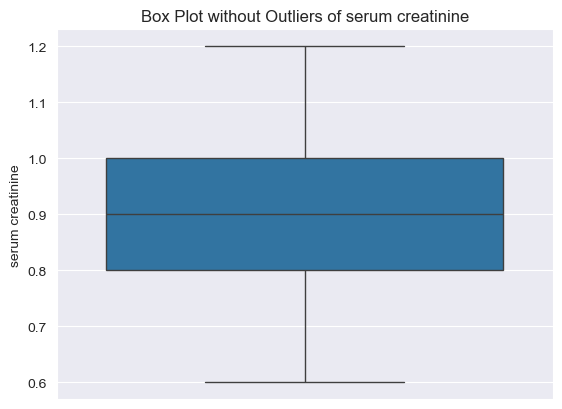

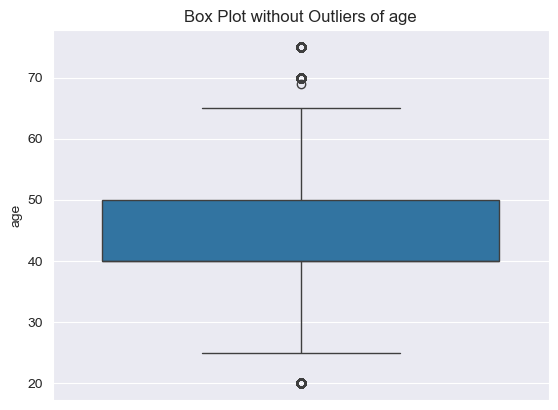

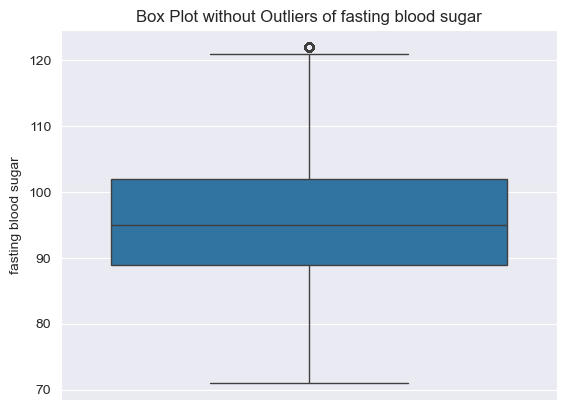

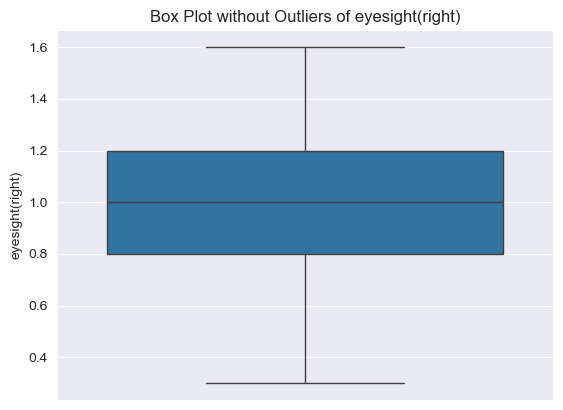

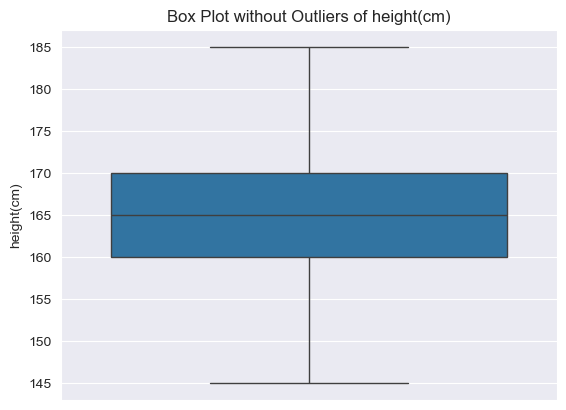

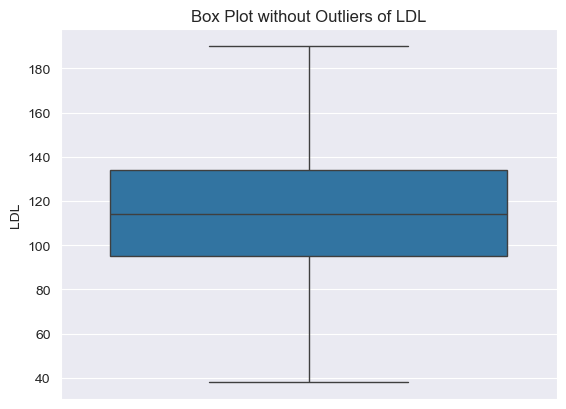

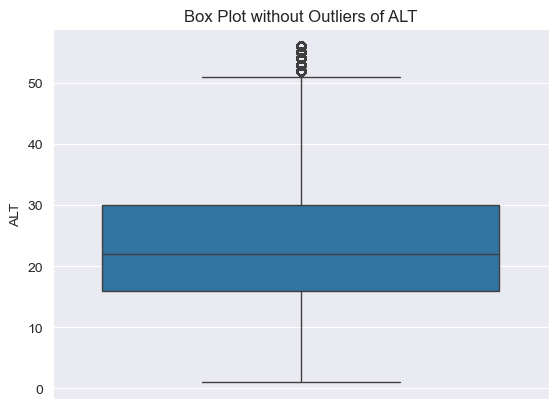

In [18]:
numeric_columns = df_min_max_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]


for i in numeric_columns:
    sns.boxplot(data[i])
    plt.title(f'Box Plot without Outliers of {i}')
    plt.show()

In [19]:
def mean_standardization(data):
    df_z_scaled = data.copy()
    data_columns=df_z_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]
    # apply normalization techniques 
    for column in data_columns: 
        df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
    return df_z_scaled
  
# view normalized data  
df_z_scaled = mean_standardization(data)
display(df_z_scaled)

,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,-0.337592,0.705878,0.974529,-0.204777,-1.388553,-0.041429,-1.541634,0,0.084758,1,1
1,0.475662,-0.565766,-2.074030,-1.754701,-1.730640,0.530604,-0.839764,0,0.643099,1,1
2,-0.662894,0.705878,-0.767504,-0.514762,0.663970,1.674672,-0.488828,1,0.270872,1,0
3,-0.825545,-0.565766,-1.203013,-0.514762,-0.020204,-0.041429,-0.839764,0,-1.031925,1,1
4,-0.012290,-1.201587,0.539021,0.518522,0.663970,0.530604,-0.605807,1,1.666725,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132839,-0.012290,1.341700,-1.638521,0.001880,0.663970,1.674672,0.330021,1,0.456986,1,0
132840,-0.500243,-1.837409,0.539021,-0.721418,-0.020204,-1.185497,-0.254872,0,-0.380526,1,0
132841,-1.476148,-1.837409,-0.331996,-1.238060,-0.020204,-0.613463,-0.839764,0,-1.404152,1,0
132842,-0.337592,1.341700,0.539021,2.688416,-0.020204,-0.041429,-1.346670,0,-0.659697,1,1


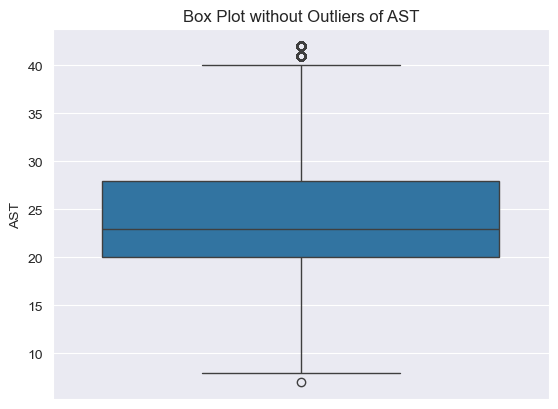

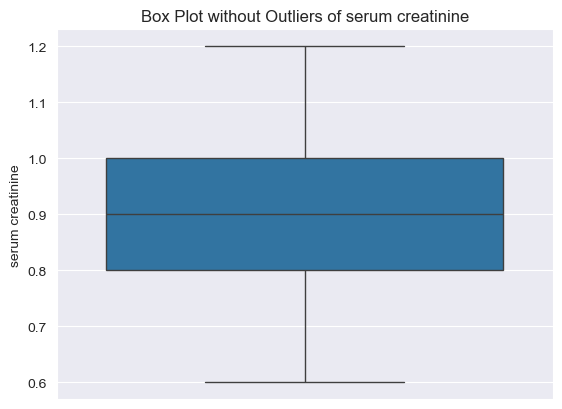

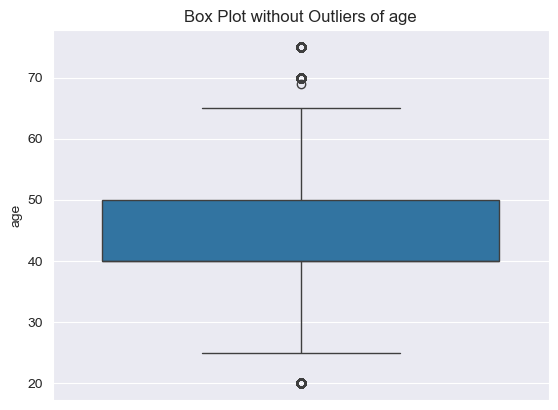

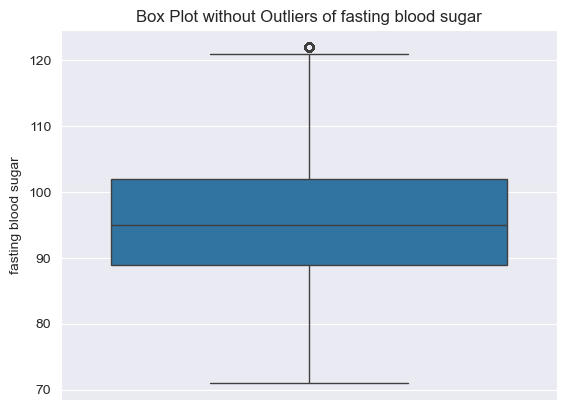

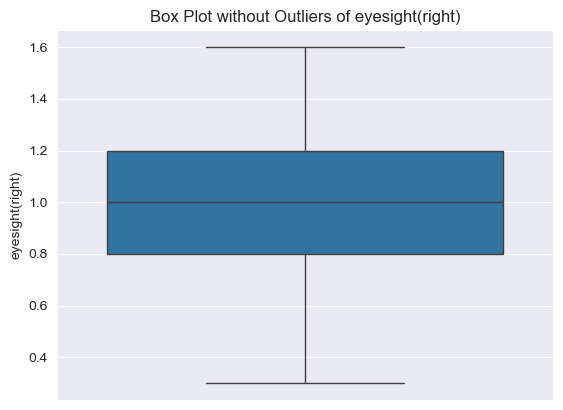

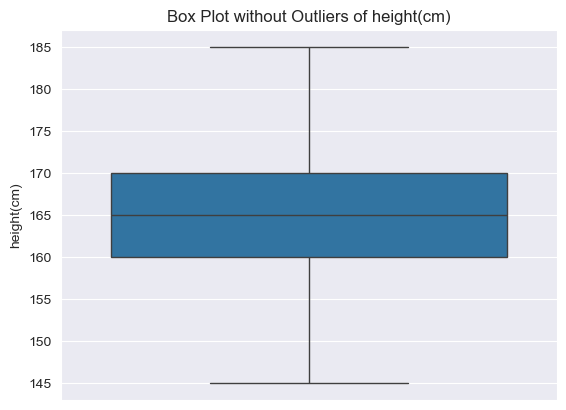

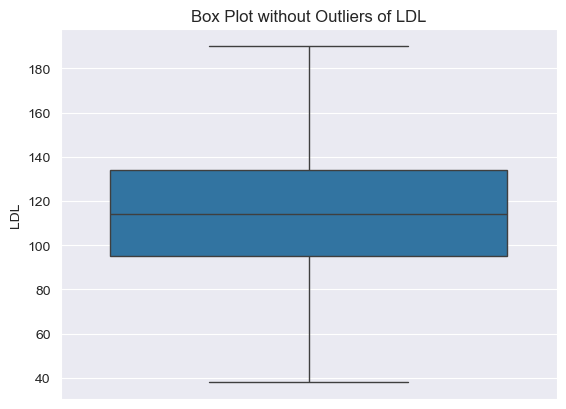

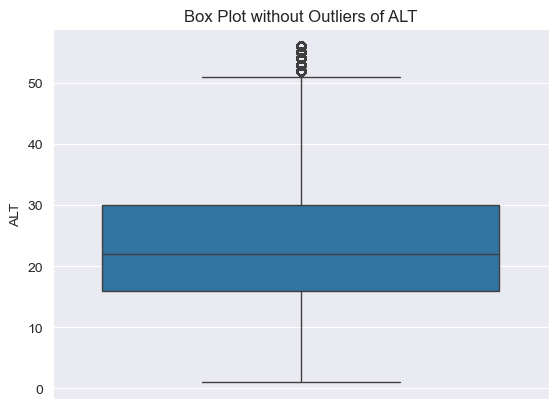

In [20]:
numeric_columns = df_z_scaled[['AST','serum creatinine','age','fasting blood sugar','eyesight(right)','height(cm)','LDL','ALT']]


for i in numeric_columns:
    sns.boxplot(data[i])
    plt.title(f'Box Plot without Outliers of {i}')
    plt.show()

In [21]:
data = mean_standardization(data)
display(data)

,AST,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,ALT,hearing(right),smoking
0,-0.337592,0.705878,0.974529,-0.204777,-1.388553,-0.041429,-1.541634,0,0.084758,1,1
1,0.475662,-0.565766,-2.074030,-1.754701,-1.730640,0.530604,-0.839764,0,0.643099,1,1
2,-0.662894,0.705878,-0.767504,-0.514762,0.663970,1.674672,-0.488828,1,0.270872,1,0
3,-0.825545,-0.565766,-1.203013,-0.514762,-0.020204,-0.041429,-0.839764,0,-1.031925,1,1
4,-0.012290,-1.201587,0.539021,0.518522,0.663970,0.530604,-0.605807,1,1.666725,1,1
...,...,...,...,...,...,...,...,...,...,...,...
132839,-0.012290,1.341700,-1.638521,0.001880,0.663970,1.674672,0.330021,1,0.456986,1,0
132840,-0.500243,-1.837409,0.539021,-0.721418,-0.020204,-1.185497,-0.254872,0,-0.380526,1,0
132841,-1.476148,-1.837409,-0.331996,-1.238060,-0.020204,-0.613463,-0.839764,0,-1.404152,1,0
132842,-0.337592,1.341700,0.539021,2.688416,-0.020204,-0.041429,-1.346670,0,-0.659697,1,1


In [22]:
data['AST_ALT_ratio'] = data['AST'] / data['ALT']
data = data.drop(columns=['AST', 'ALT'])
display(data)

,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,hearing(right),smoking,AST_ALT_ratio
0,0.705878,0.974529,-0.204777,-1.388553,-0.041429,-1.541634,0,1,1,-3.983006
1,-0.565766,-2.074030,-1.754701,-1.730640,0.530604,-0.839764,0,1,1,0.739640
2,0.705878,-0.767504,-0.514762,0.663970,1.674672,-0.488828,1,1,0,-2.447259
3,-0.565766,-1.203013,-0.514762,-0.020204,-0.041429,-0.839764,0,1,1,0.800005
4,-1.201587,0.539021,0.518522,0.663970,0.530604,-0.605807,1,1,1,-0.007374
...,...,...,...,...,...,...,...,...,...,...
132839,1.341700,-1.638521,0.001880,0.663970,1.674672,0.330021,1,1,0,-0.026894
132840,-1.837409,0.539021,-0.721418,-0.020204,-1.185497,-0.254872,0,1,0,1.314608
132841,-1.837409,-0.331996,-1.238060,-0.020204,-0.613463,-0.839764,0,1,0,1.051274
132842,1.341700,0.539021,2.688416,-0.020204,-0.041429,-1.346670,0,1,1,0.511738


Since AST and ALT are has high positive correlation and there ratio is useful we can replace the 2 features by new one which is their ratio

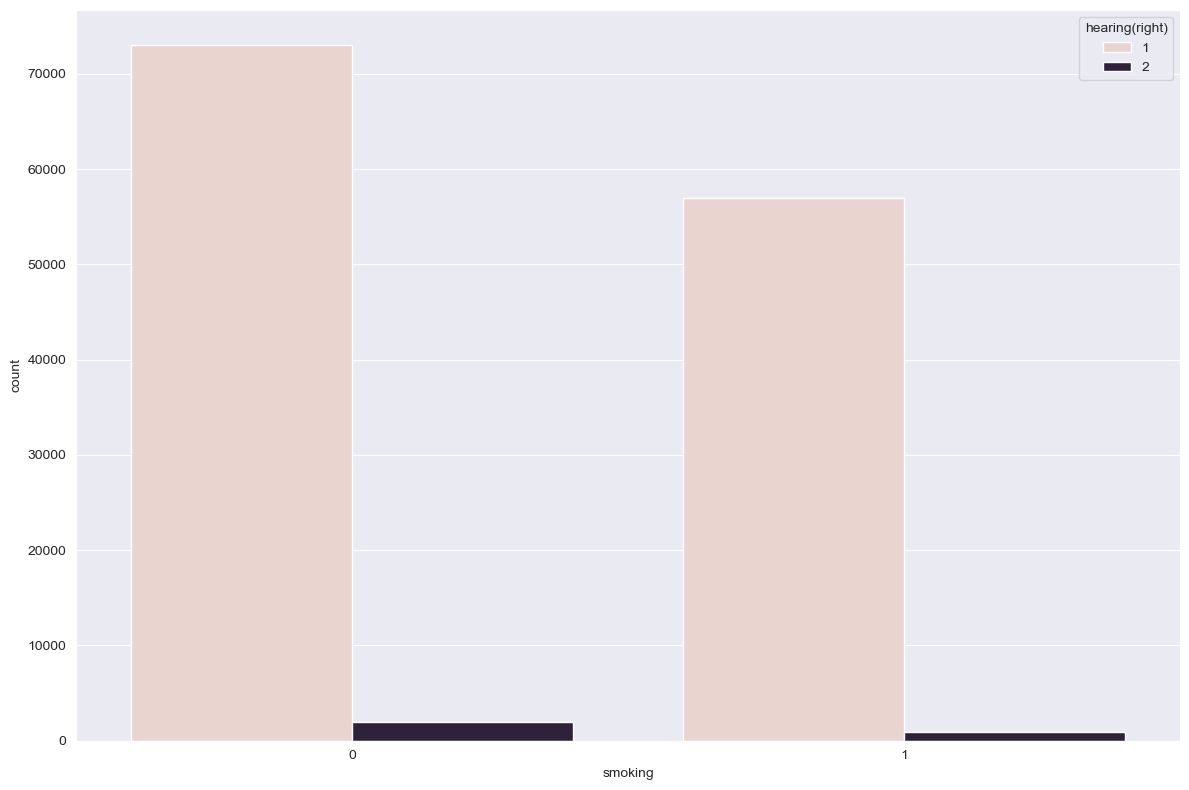

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='smoking', hue='hearing(right)')
plt.tight_layout()


Since there are very small values having value 2 and most of them are 1 and since it has very low correlation with smoking as shown in the exploratory file in the heatmap so this feature is useless

In [24]:
data = data.drop(columns=['hearing(right)'])
display(data)

,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,dental caries,smoking,AST_ALT_ratio
0,0.705878,0.974529,-0.204777,-1.388553,-0.041429,-1.541634,0,1,-3.983006
1,-0.565766,-2.074030,-1.754701,-1.730640,0.530604,-0.839764,0,1,0.739640
2,0.705878,-0.767504,-0.514762,0.663970,1.674672,-0.488828,1,0,-2.447259
3,-0.565766,-1.203013,-0.514762,-0.020204,-0.041429,-0.839764,0,1,0.800005
4,-1.201587,0.539021,0.518522,0.663970,0.530604,-0.605807,1,1,-0.007374
...,...,...,...,...,...,...,...,...,...
132839,1.341700,-1.638521,0.001880,0.663970,1.674672,0.330021,1,0,-0.026894
132840,-1.837409,0.539021,-0.721418,-0.020204,-1.185497,-0.254872,0,0,1.314608
132841,-1.837409,-0.331996,-1.238060,-0.020204,-0.613463,-0.839764,0,0,1.051274
132842,1.341700,0.539021,2.688416,-0.020204,-0.041429,-1.346670,0,1,0.511738


In [25]:
data = data.drop(columns=['dental caries'])
display(data)

,serum creatinine,age,fasting blood sugar,eyesight(right),height(cm),LDL,smoking,AST_ALT_ratio
0,0.705878,0.974529,-0.204777,-1.388553,-0.041429,-1.541634,1,-3.983006
1,-0.565766,-2.074030,-1.754701,-1.730640,0.530604,-0.839764,1,0.739640
2,0.705878,-0.767504,-0.514762,0.663970,1.674672,-0.488828,0,-2.447259
3,-0.565766,-1.203013,-0.514762,-0.020204,-0.041429,-0.839764,1,0.800005
4,-1.201587,0.539021,0.518522,0.663970,0.530604,-0.605807,1,-0.007374
...,...,...,...,...,...,...,...,...
132839,1.341700,-1.638521,0.001880,0.663970,1.674672,0.330021,0,-0.026894
132840,-1.837409,0.539021,-0.721418,-0.020204,-1.185497,-0.254872,0,1.314608
132841,-1.837409,-0.331996,-1.238060,-0.020204,-0.613463,-0.839764,0,1.051274
132842,1.341700,0.539021,2.688416,-0.020204,-0.041429,-1.346670,1,0.511738


The dental caries have weak positive correlation, thus likely unimportant

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'final_data' is your DataFrame
X = data.drop(columns=['smoking'])
y = data['smoking']

# Split the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
y_train = np.ravel(y_train)
y_val = np.ravel(y_valid)
y_test = np.ravel(y_test)


# Print the shapes of the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_valid.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 92990 samples
Validation set size: 19927 samples
Test set size: 19927 samples


In [27]:
class BaggingClassifier:
    def __init__(self, base_classifier, n_estimators):
        self.base_classifier = base_classifier
        self.n_estimators = n_estimators
        self.classifiers = []

    def fit(self, X, y):
        self.classifiers = []
        if isinstance(X, pd.DataFrame):
            X = X.reset_index(drop=True)
        if isinstance(y, pd.Series):
            y = y.reset_index(drop=True)

        for _ in range(self.n_estimators):
            indices = np.random.choice(len(X), len(X), replace=True)
            X_sampled = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
            y_sampled = y.iloc[indices] if isinstance(y, pd.Series) else y[indices]

            # Train a new base classifier on the sampled data
            classifier = self.base_classifier.__class__(**self.base_classifier.get_params())
            classifier.fit(X_sampled, y_sampled)
            self.classifiers.append(classifier)

    def predict(self, X):
        predictions = np.zeros((len(X), self.n_estimators))
        for i, classifier in enumerate(self.classifiers):
            predictions[:, i] = classifier.predict(X)
        return np.round(predictions.mean(axis=1)).astype(int)
    
    # Add get_params for compatibility with GridSearchCV
    def get_params(self, deep=True):
        return {
            'base_classifier': self.base_classifier,
            'n_estimators': self.n_estimators,
        }

    # Add set_params for compatibility with GridSearchCV
    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self


In [28]:
base_model = DecisionTreeClassifier(random_state=42)

# Initialize and train the Bagging model
bagging_model = BaggingClassifier(base_model,n_estimators=1000)
bagging_model.fit(X_train, y_train)

# Make predictions
y_valid_bagging = bagging_model.predict(X_valid)
y_pred = bagging_model.predict(X_test)
print(f"Bagging Validation Accuracy: {accuracy_score(y_valid, y_valid_bagging)*100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)* 100:.2f}%")

Bagging Validation Accuracy: 71.31%
Test Accuracy: 70.89%


In [29]:
param_grid = {
    'n_estimators': [100, 500, 1000],  # Number of estimators to test
    'base_classifier__max_depth': [3, 5, 10]  # Depth of the decision tree
}

# Initialize the base classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the custom BaggingClassifier with a base model
bagging_model = BaggingClassifier(base_classifier, n_estimators=10)

# Perform Grid Search
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'base_classifier__max_depth': 5, 'n_estimators': 1000}
Best Cross-Validation Accuracy: 70.64%


In [30]:
param_distributions = {
    'n_estimators': randint(500, 1000), 
    'base_classifier__max_depth': randint(3, 10)  
}

random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_distributions,
    n_iter=10,  # Number of parameter settings to sample
    cv=3,
    scoring='accuracy',
    random_state=42
)
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_ * 100:.2f}%")

Best Parameters: {'base_classifier__max_depth': 9, 'n_estimators': 621}
Best Cross-Validation Accuracy: 70.66%


In [31]:
class GradientBoosting:
    def __init__(self, n_estimators, learning_rate, max_depth):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None
        self.classes_ = None

    def fit(self, X, y):
        # Store the unique classes for compatibility
        self.classes_ = np.unique(y)

        # Initialize with the mean of y (works only for binary classification)
        self.initial_prediction = np.mean(y)
        F_0 = np.full_like(y, self.initial_prediction, dtype=np.float32)

        # Train estimators
        for _ in range(self.n_estimators):
            residuals = y - F_0  # Calculate residuals
            model = DecisionTreeRegressor(max_depth=self.max_depth)  # Use regression trees for boosting
            model.fit(X, residuals)
            self.models.append(model)

            # Update predictions
            predictions = model.predict(X)
            F_0 += self.learning_rate * predictions

    def predict(self, X):
        # Start with the initial prediction
        prediction = np.full((X.shape[0],), self.initial_prediction, dtype=np.float32)

        # Add predictions from all models
        for model in self.models:
            prediction += self.learning_rate * model.predict(X)

        # Convert to classes for classification
        return np.where(prediction >= 0.5, self.classes_[1], self.classes_[0])

    def get_params(self, deep=True):
        return {
            "n_estimators": self.n_estimators,
            "learning_rate": self.learning_rate,
            "max_depth": self.max_depth,
        }

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self


In [32]:
boosting_model = GradientBoosting(n_estimators=1000,
     learning_rate=0.2,
    max_depth=3
 )

boosting_model.fit(X_train,y_train)
y_valid_boosting = boosting_model.predict(X_valid)
y_pred = boosting_model.predict(X_test)

# Convert probabilities into binary predictions (0 or 1)
y_valid_boosting_binary = (y_valid_boosting > 0.5).astype(int)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calculate accuracy
print(f"Boosting Validation Accuracy: {accuracy_score(y_valid, y_valid_boosting_binary)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_binary)*100:.2f}%")

Boosting Validation Accuracy: 73.35%
Test Accuracy: 73.11%


In [33]:
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

# Use GridSearchCV
grid_search = GridSearchCV(estimator=boosting_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.2f}%")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best Cross-Validation Accuracy: 72.76%


In [34]:
class RandomForest:
    def __init__(self, n_estimators, max_depth, random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X_train, y_train):
        np.random.seed(self.random_state)
        self.trees = []
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            X_sample, y_sample = resample(X_train, y_train, random_state=self.random_state)
            
            # Create and train a decision tree
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X_test):
        # Collect predictions from all trees
        tree_predictions = np.array([tree.predict(X_test) for tree in self.trees])
        
        # Majority voting for classification
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=tree_predictions)

    def get_params(self, deep=True):
        """Return parameters for compatibility with GridSearchCV."""
        return {
            "n_estimators": self.n_estimators,
            "max_depth": self.max_depth,
            "random_state": self.random_state,
        }

    def set_params(self, **params):
        """Set parameters for compatibility with GridSearchCV."""
        for param, value in params.items():
            setattr(self, param, value)
        return self

In [35]:
randomforest_model = RandomForest(n_estimators=2000, max_depth=5, random_state=42)
randomforest_model.fit(X_train, y_train)

y_valid_rf = randomforest_model.predict(X_valid)
y_pred = randomforest_model.predict(X_test)
print(f"Random Forest Validation Accuracy: {accuracy_score(y_valid, y_valid_rf)*100:.2f}%")
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Random Forest Validation Accuracy: 71.89%
Test Accuracy: 71.51%


In [36]:
# Define the parameter grid for tuning
param_grid = {
    "n_estimators": [500, 1000],
    "max_depth": [3, 5, 10],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

# Evaluate on the test set
best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Best Parameters: {'max_depth': 5, 'n_estimators': 500}
Best Cross-Validation Accuracy: 71.97%
Test Accuracy: 71.51%
